In [1]:
!kaggle datasets download -d noordeen/insurance-premium-prediction

  0%|                                               | 0.00/13.4k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 13.4k/13.4k [00:00<00:00, 63.7MB/s]


In [2]:
!unzip insurance-premium-prediction.zip -d data_input

Archive:  insurance-premium-prediction.zip
  inflating: data_input/insurance.csv  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data_input//insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [5]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [6]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [7]:
# find top 5 where expenses are high
df.sort_values(by='expenses', ascending=False).head()

,age,sex,bmi,children,smoker,region,expenses
543,54,female,47.4,0,yes,southeast,63770.43
1300,45,male,30.4,0,yes,southeast,62592.87
1230,52,male,34.5,3,yes,northwest,60021.40
577,31,female,38.1,1,yes,northeast,58571.07
819,33,female,35.5,0,yes,northwest,55135.40


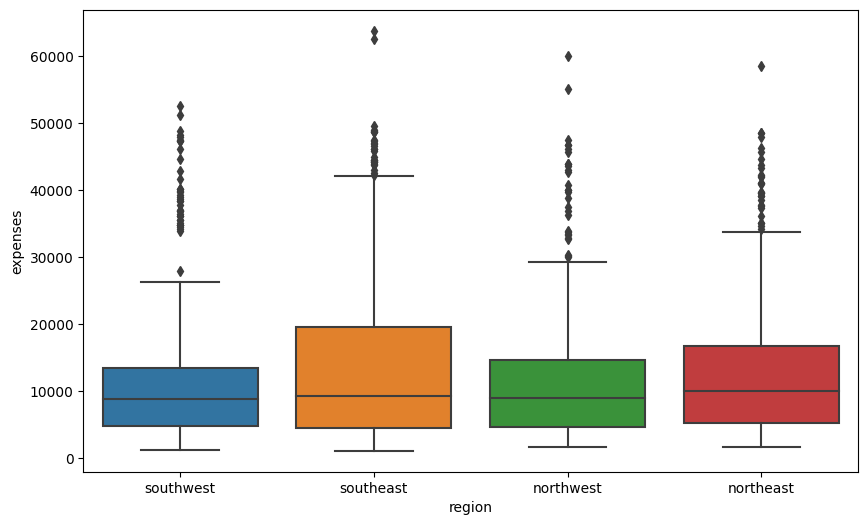

In [8]:
# look for the plot for where the expenses are high

plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='expenses', data=df)
plt.show()



In [9]:
# Find the value counts of male and female on sex column, different approach

print('Male:', df['sex'].value_counts()[0])
print('Female:', df['sex'].value_counts()[1])

Male: 676
Female: 662


In [10]:
# Find the value counts of smoker and non-smoker on smoker column

print('Smoker:', df['smoker'].value_counts()[0])
print('Non-smoker:', df['smoker'].value_counts()[1])

Smoker: 1064
Non-smoker: 274


## I'm trying two different approach for preprocessing the data 

its just a curiosity wether the output will be the same or not. hopefully it will be the same(?) 

### First one im gonna use **one hot encoding** to change the categorical 

In [11]:
# one hot encoding for categorical columns

df_oh = pd.get_dummies(df, drop_first=True)
df_oh.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,False,True,False,False,True
1,18,33.8,1,1725.55,True,False,False,True,False
2,28,33.0,3,4449.46,True,False,False,True,False
3,33,22.7,0,21984.47,True,False,True,False,False
4,32,28.9,0,3866.86,True,False,True,False,False


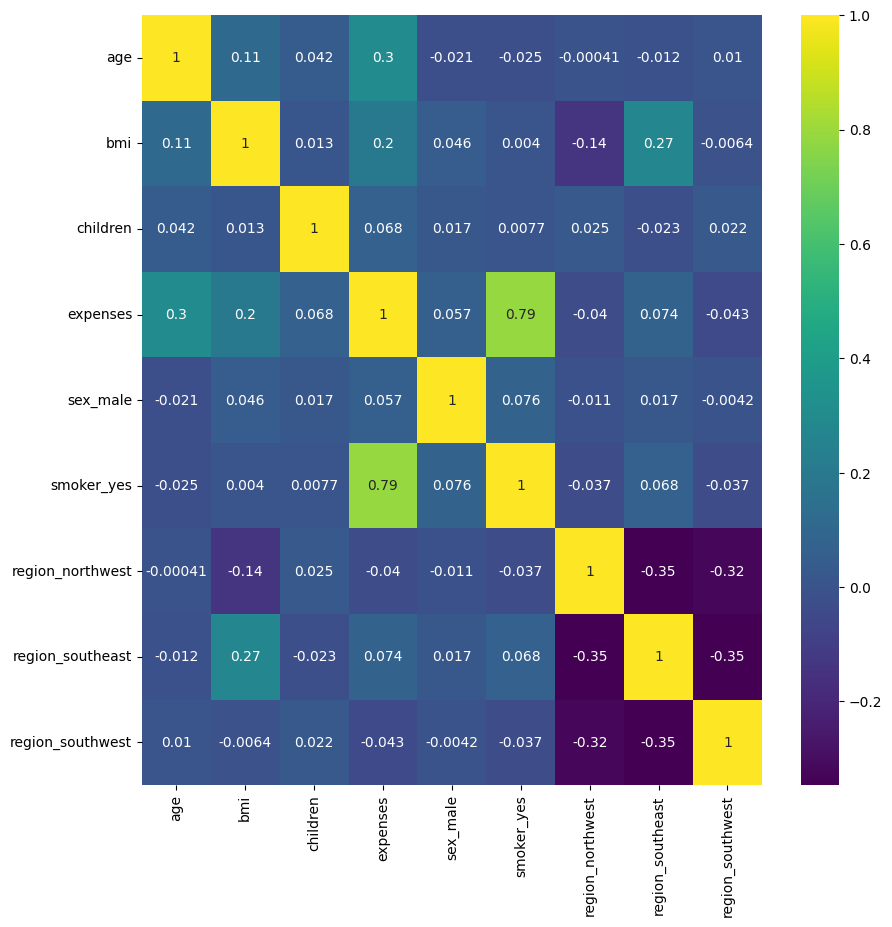

In [12]:
# let see the correlation of each column with each other

plt.figure(figsize=(10, 10))
sns.heatmap(df_oh.corr(), annot=True, cmap='viridis')
plt.show()

In [13]:
# find the annova test, using hypothesis testing

# H0: There is no significant difference between smoker and non-smoker
# H1: There is significant difference between smoker and non-smoker

# p-value is less than 0.05, so we reject the null hypothesis and accept the alternate hypothesis
# find the annova test

from scipy.stats import f_oneway

smoker = df_oh[df_oh['smoker_yes'] == 1]['expenses']
non_smoker = df_oh[df_oh['smoker_yes'] == 0]['expenses']

f_oneway(smoker, non_smoker)
print('p-value:', f_oneway(smoker, non_smoker)[1])

p-value: 8.27144957450302e-283


## Second approach im using categorical into numerical

In [14]:
# make sex and smoker column to numeric

df['sex'] = df['sex'].map({'male':0, 'female':1})
df['smoker'] = df['smoker'].map({'no':0, 'yes':1})
df['region'] = df['region'].map({'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3})

df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,0,16884.92
1,18,0,33.8,1,0,1,1725.55
2,28,0,33.0,3,0,1,4449.46
3,33,0,22.7,0,0,2,21984.47
4,32,0,28.9,0,0,2,3866.86


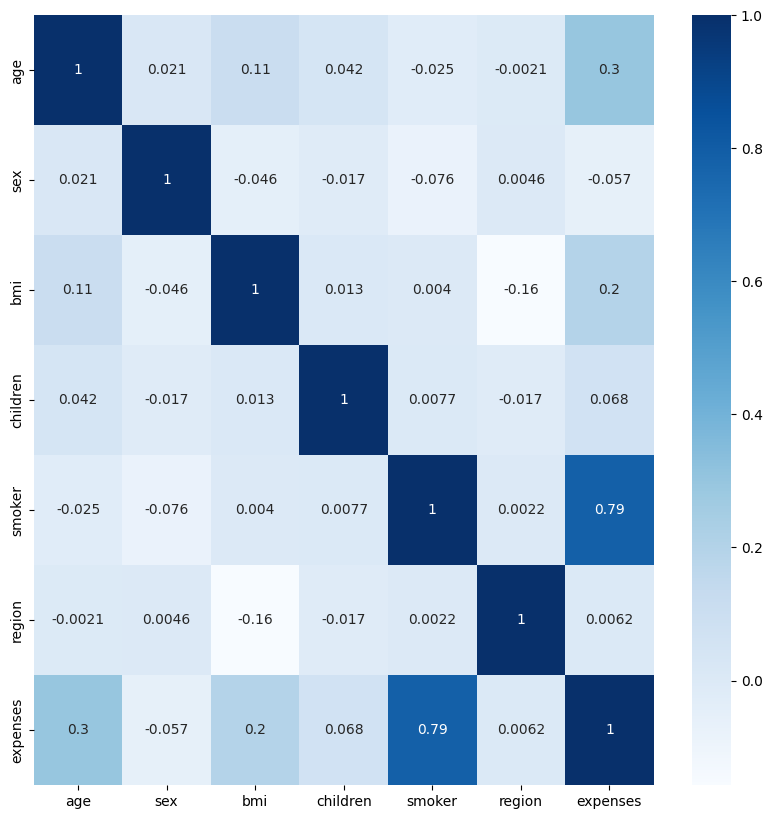

In [15]:
# find correlation between features

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()


- we can see that smoker and expenses are highly correlated, same results as the one hot encoding method

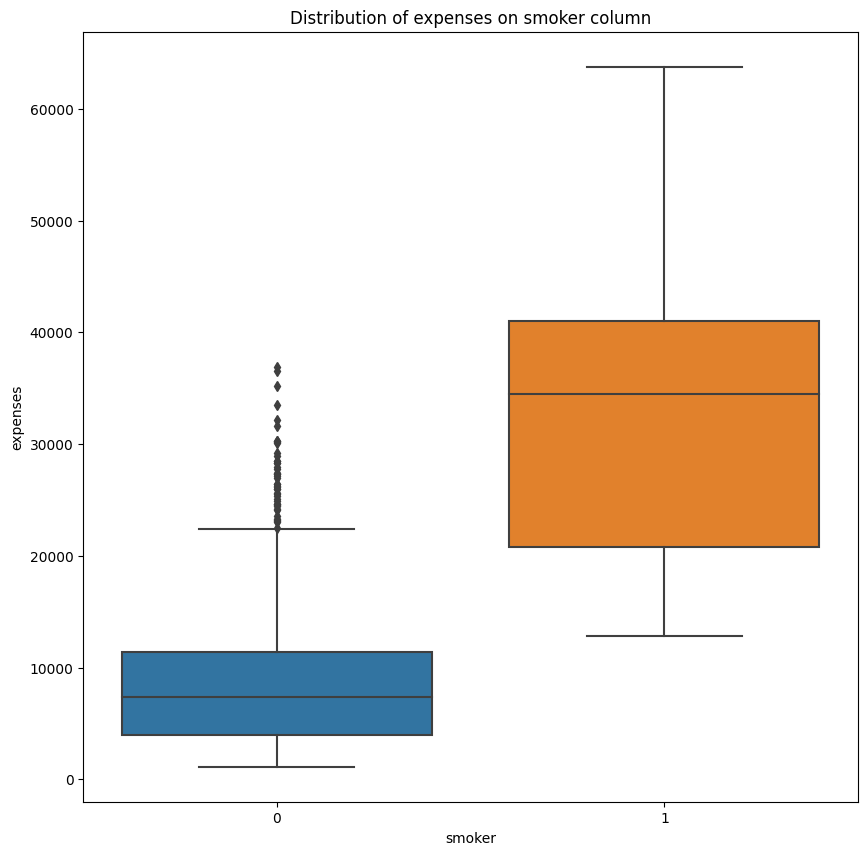

In [16]:
# take a look at the distribution between expenses and smoker column

plt.figure(figsize=(10, 10))
sns.boxplot(x='smoker', y='expenses', data=df)
plt.title('Distribution of expenses on smoker column')
plt.show()

In [17]:
# T- Test

from scipy.stats import ttest_ind

smoker = df[df['smoker'] == 1]['expenses']
non_smoker = df[df['smoker'] == 0]['expenses']

# perform t-test
ttest = ttest_ind(smoker, non_smoker)
print('T-statistics:', ttest.statistic)
print('P-value:', ttest.pvalue)

T-statistics: 46.6649210792002
P-value: 8.271449574495316e-283


In [18]:
# ANOVA Test

from scipy.stats import f_oneway

smoker = df[df['smoker'] == 1]['expenses']
non_smoker = df[df['smoker'] == 0]['expenses']

# perform ANOVA test
anova = f_oneway(smoker, non_smoker)
print('F-statistics:', anova.statistic)
print('P-value:', anova.pvalue)

F-statistics: 2177.6148593279827
P-value: 8.27144957450302e-283


ANOVA results with a very low p-value (close to zero) indicate that there are significant differences in medical expenses among the groups you tested (likely "smoker" categories). The F-statistic measures the magnitude of these differences, and the low p-value strongly suggests that at least one group's mean is different from the others in a statistically significant way.

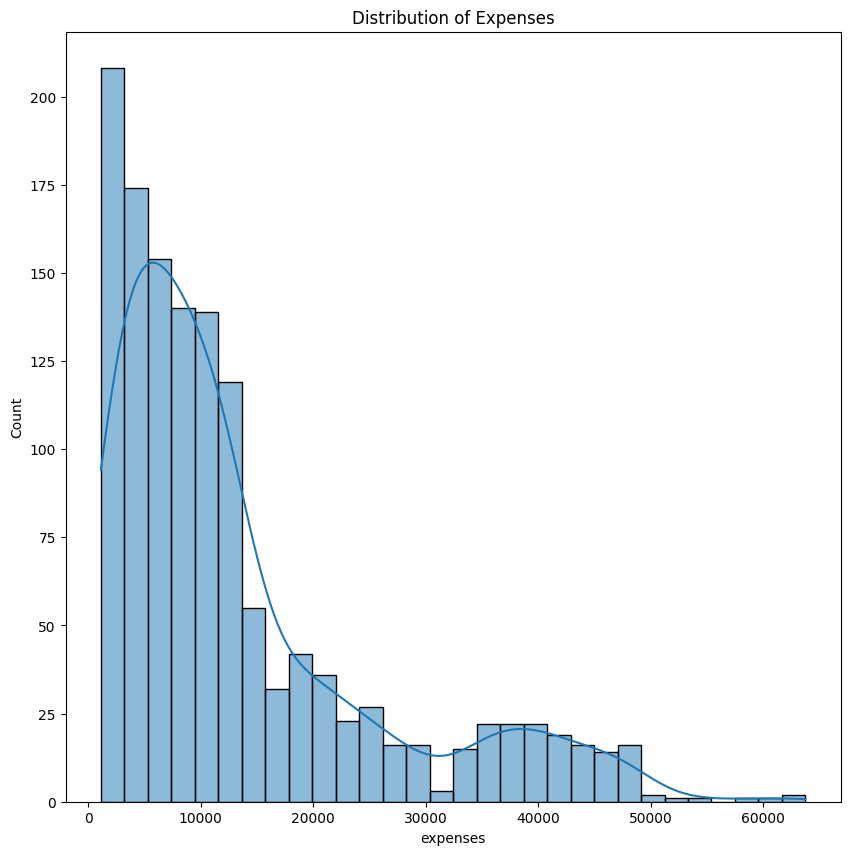

In [19]:
plt.figure(figsize=(10, 10))
sns.histplot(df['expenses'], kde=True)
plt.title('Distribution of Expenses')
plt.show()

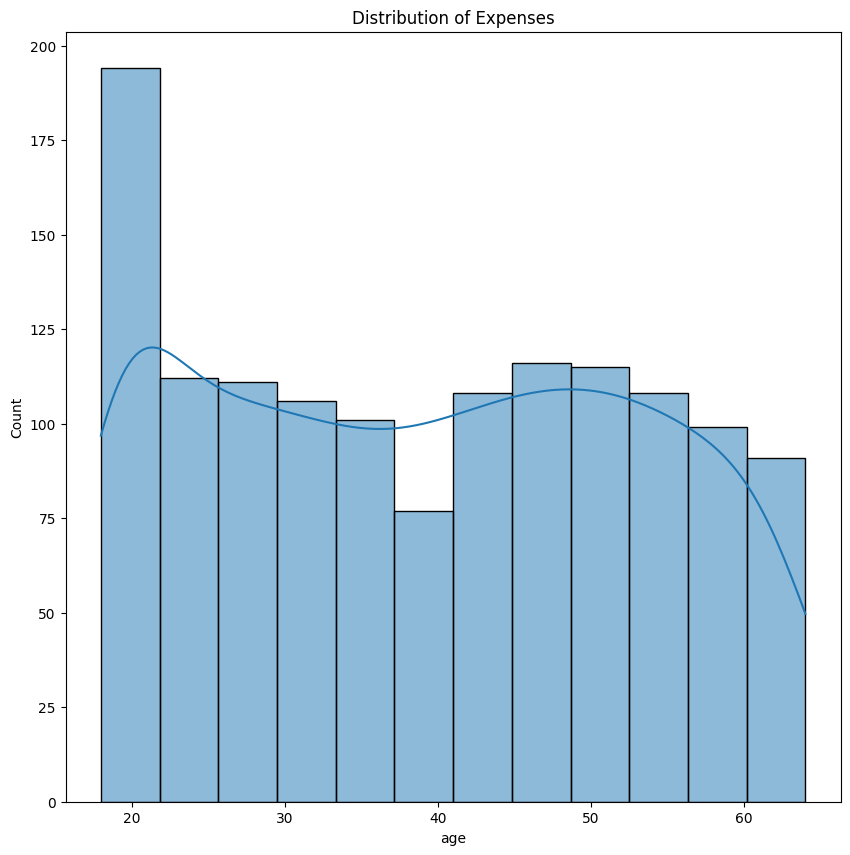

In [20]:
plt.figure(figsize=(10, 10))
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Expenses')
plt.show()

In [21]:
# Build Model for prediction

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [22]:
# split data into train and test

X = df.drop('expenses', axis=1)
y = df['expenses']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Linear Regression

- Use simple linear regression when you have a **single predictor variable (feature)** or when you have strong domain knowledge suggesting a linear relationship between the predictor and the target variable.

- Simple linear regression is more straightforward and easier to interpret when there are clear linear relationships in the data, and you don't need to perform feature selection.

- If your primary goal is to fit a linear model without imposing regularization or feature selection, and you have a small number of predictor variables, simple linear regression may be a good choice.



In [23]:
LinearRegression = LinearRegression()
LinearRegression.fit(X_train, y_train)

# predict the test data
y_pred = LinearRegression.predict(X_test)

# find the score of the model
print('Score:', LinearRegression.score(X_test, y_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

Score: 0.7833214205203848
RMSE: 5799.920265829356
MAE: 4186.9401063170135
R2: 0.7833214205203848


If your primary concern is minimizing the financial impact of errors, you might lean toward **RMSE**. However, if you want a more interpretable and easily understandable measure of prediction accuracy, **MAE** can be a valid choice.

# Lasso Model

- Use Lasso regression when you have a **large number of predictor variables (features)** and you suspect that not all of them are relevant. Lasso can automatically perform feature selection by driving some of the coefficients to exactly zero, effectively removing those features from the model.

- Lasso is particularly useful when you want to create a more interpretable model that focuses on a subset of the most important features, reducing model complexity.

- Lasso is helpful when you want to prevent overfitting by adding L1 regularization to the linear regression model, which can reduce the risk of fitting noise in the data.

In [24]:
# Try lasso 
from sklearn.linear_model import Lasso

Lasso = Lasso()
Lasso.fit(X_train, y_train)

# predict the test data
y_pred = Lasso.predict(X_test)

# find the score of the model
print('Score:', Lasso.score(X_test, y_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred))


Score: 0.7832948524539634
RMSE: 5800.275833841662
MAE: 4187.676268278807


## Random Forest

- Random Forest can capture complex, non-linear relationships between predictor variables and insurance expenses, making it suitable for situations where the relationship is not purely linear.

- It is less prone to overfitting compared to individual decision trees, thanks to the ensemble approach.

- Feature importance: Random Forest can provide information about the importance of each predictor variable in making predictions, which can be valuable for understanding the factors influencing insurance expenses.

- It can handle a mix of categorical and numerical predictor variables.

In [25]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

RandomForestRegressor = RandomForestRegressor()
model_rf = RandomForestRegressor.fit(X_train, y_train)

# predict the test data
y_pred = model_rf.predict(X_test)

# find the score of the model
print('Score:', RandomForestRegressor.score(X_test, y_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred))

Score: 0.864518049363918
RMSE: 4586.2186253074915
MAE: 2466.0873925746273


Based on these metrics, **Random Forest** appears to be the **best-performing model** among the three. It has the highest R-squared, the lowest RMSE, and the lowest MAE. This suggests that Random Forest provides the best trade-off between explanatory power and predictive accuracy.

In [26]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,0,16884.92
1,18,0,33.8,1,0,1,1725.55
2,28,0,33.0,3,0,1,4449.46
3,33,0,22.7,0,0,2,21984.47
4,32,0,28.9,0,0,2,3866.86


In [27]:
# test with new data

new_data = [[19, 1, 27.9, 0, 1, 0]]
print('Linear Regression:', LinearRegression.predict(new_data))
print('Lasso:', Lasso.predict(new_data))
print('Random Forest:', RandomForestRegressor.predict(new_data))


Linear Regression: [25138.01692601]
Lasso: [25132.9131742]
Random Forest: [17056.8314]


In [28]:
# make new column category based on expenses, 0-20000 low, 20000-40000 medium, 40000-60000 high

df['premium_category'] = df['expenses'].apply(lambda x: 'low' if x < 20000 else ('medium' if x < 40000 else 'high'))
df.head()

,age,sex,bmi,children,smoker,region,expenses,premium_category
0,19,1,27.9,0,1,0,16884.92,low
1,18,0,33.8,1,0,1,1725.55,low
2,28,0,33.0,3,0,1,4449.46,low
3,33,0,22.7,0,0,2,21984.47,medium
4,32,0,28.9,0,0,2,3866.86,low


In [29]:
# try multiouput regressor

from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

x = df.drop(['expenses', 'premium_category'], axis=1)
y = df[['expenses', 'premium_category']]

# encode the categorical premium_category column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y['premium_category'] = le.fit_transform(y['premium_category'])

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# multioutput with random forest
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, max_depth=30, random_state=42))
model.fit(X_train, y_train)

# predict the test data
y_pred = model.predict(X_test)

# split the predicted data into expenses and premium_category
y_pred_expenses = y_pred[:, 0]
y_pred_category = y_pred[:, 1]

# Decode the premium_category column
y_pred_category = le.inverse_transform(y_pred_category.astype(int))



In [30]:
# evaluate the model with new data 
new_data = [[19, 1, 27.9, 0, 1, 0]]
print('Multioutput Regressor:', model.predict(new_data))
print('Expenses:', y_pred_expenses)
print('Premium Category:', y_pred_category)

Multioutput Regressor: [[1.71004615e+04 1.06000000e+00]]
Expenses: [11185.7404   5268.3755  28180.595   10524.424   34448.5121   8644.5113
  2095.3189  14397.6618   6220.2171  10551.4169  19973.2256   7166.6647
  4923.0855  46022.678   48415.6805  45259.3285  10050.3435  43202.1059
  8999.9216  24523.4364   5477.2966  10570.431    2432.5651   2691.3566
 12660.1586  12172.7516  13224.6555   6709.4303  10754.2635   5046.68775
  7890.3433  11732.8652   2309.6093   5245.1414   3181.5498  10995.4436
  2608.3401   8426.7479  23358.1215  39311.8538   6370.573    2813.0798
 12118.21    15619.5576   5748.0901  15046.049   14146.6872   5762.3479
 41991.5764   7590.6369  13844.6747   2351.5003   6542.1387   1836.6664
 12195.1721  11943.4592   3792.6594  45370.0551  12831.5746  14996.9989
 13722.1599   7480.0533  20077.3648   8155.6783  12186.2711   6383.4067
 18152.8184  14600.3624   7968.6262   2503.4486   7821.6648  10749.0586
  8992.4005   9825.9743   8274.4752   4995.2347   8932.215   12422.6

In [31]:
le.fit(df['premium_category'])
le.fit(y_train['premium_category'])


LabelEncoder()

In [32]:
encoded_labels = le.classes_
print(encoded_labels)

[0 1 2]


In [33]:
encoded_value = 1  # Replace with the encoded value you want to decode
decoded_label = le.inverse_transform([encoded_value])
print(f'Encoded value {encoded_value} corresponds to label {decoded_label[0]}')


Encoded value 1 corresponds to label 1


In [34]:
df.head()

,age,sex,bmi,children,smoker,region,expenses,premium_category
0,19,1,27.9,0,1,0,16884.92,low
1,18,0,33.8,1,0,1,1725.55,low
2,28,0,33.0,3,0,1,4449.46,low
3,33,0,22.7,0,0,2,21984.47,medium
4,32,0,28.9,0,0,2,3866.86,low


In [35]:
# Evaluate the model with new data 
new_data = [[19, 1, 27.9, 0, 1, 0]]
predictions = model.predict(new_data)
predicted_expenses = predictions[0][0]  # Extract predicted expenses
predicted_category = y_pred_category[0]  # Extract predicted category


# Print the results with labels
print('New Data:')
print('Age: 19, Gender: Male, BMI: 27.9, Smoker: No, Region: Southeast, Children: 0')
print('----------------------------------------')
print(f"Predicted Expenses: {predicted_expenses:.2f}")
print('Predicted Premium Category:', predicted_category)


New Data:
Age: 19, Gender: Male, BMI: 27.9, Smoker: No, Region: Southeast, Children: 0
----------------------------------------
Predicted Expenses: 17100.46
Predicted Premium Category: low


In [36]:
# try with another example 
new_data = [[32, 0, 28.9, 0, 0, 2]]
predictions = model.predict(new_data)
predicted_expenses = predictions[0][0]  # Extract predicted expenses
predicted_category = y_pred_category[0]  # Extract predicted category

# print the results with labels
print('New Data:')
print('Age:32, Gender:Male, BMI:28.9, Smoker:No, Region:Northwest, Children:2')
print('----------------------------------------')
print(f"Predicted Expenses: {predicted_expenses:.2f}")
print('Predicted Premium Category:', predicted_category)


New Data:
Age:32, Gender:Male, BMI:28.9, Smoker:No, Region:Northwest, Children:2
----------------------------------------
Predicted Expenses: 3923.93
Predicted Premium Category: low


In [37]:
# find the score of the model
print('Score:', model.score(X_test, y_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred))

Score: 0.7257404785843301
RMSE: 3270.5587655927943
MAE: 1274.3358213868157


## Saving my random forest model

In [38]:
# save the model into h5

import joblib

rf_model = 'model_rf.h5'

joblib.dump(model_rf, rf_model)
print('Model saved successfully')

Model saved successfully


Trying different approach with param_grid

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
}

# Create a Random Forest Regressor
rf = RandomForestRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

# Fit the model with the best hyperparameters
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(X_train, y_train)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 300}


RandomForestRegressor(max_depth=10, min_samples_leaf=4, n_estimators=300)

In [40]:
from sklearn.ensemble import RandomForestRegressor

# Create a new Random Forest Regressor with the best hyperparameters
best_rf = RandomForestRegressor(max_depth=30, min_samples_leaf=4, n_estimators=100)

# Fit the model to your training data
best_rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=30, min_samples_leaf=4)

In [41]:
# Predict on the test data
y_pred = best_rf.predict(X_test)

# Evaluate the model
print('Score:', best_rf.score(X_test, y_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred))


Score: 0.6970668666132258
RMSE: 3085.7104015173873
MAE: 1205.1118634357663


## Machine Learning model

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from math import sqrt

In [61]:
df_ml = pd.read_csv('./data_input/insurance.csv')
df_ml.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [62]:
# turn categorical columns into numeric

df_ml['sex'] = pd.factorize(df_ml.sex)[0] 
df_ml['smoker'] = pd.factorize(df_ml.smoker)[0]
df_ml['region'] = pd.factorize(df_ml.region)[0]

In [64]:
df_ml.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,0,16884.92
1,18,1,33.8,1,1,1,1725.55
2,28,1,33.0,3,1,1,4449.46
3,33,1,22.7,0,1,2,21984.47
4,32,1,28.9,0,1,2,3866.86


In [63]:
x = df_ml.drop('expenses', axis=1)
y = df_ml['expenses']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [66]:
gbr = GradientBoostingRegressor()

In [67]:
model = gbr 

n_estimators  = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
learning_rate = [0.05, 0.1, 0.15, 0.20]
# min_samples_leaf = [1, 2, 5, 10, 15]
max_features = [2, 3, 5, 10, 15]

hyperparameters_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate': learning_rate,
    # 'min_samples_leaf': min_samples_leaf,
    'max_features': max_features
}

In [68]:
random_cv = RandomizedSearchCV(estimator= model,
                               param_distributions= hyperparameters_grid,
                               cv=5, n_iter=50,
                               scoring= 'neg_mean_absolute_error', n_jobs= 4,
                               verbose= 5, return_train_score= True,
                               random_state= 42)

In [69]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END learning_rate=0.15, max_depth=15, max_features=5, n_estimators=500;, score=(train=-0.000, test=-2778.371) total time=   0.3s
[CV 3/5] END learning_rate=0.15, max_depth=15, max_features=5, n_estimators=500;, score=(train=-22.361, test=-3171.113) total time=   0.4s
[CV 2/5] END learning_rate=0.15, max_depth=15, max_features=5, n_estimators=500;, score=(train=-36.966, test=-2855.949) total time=   0.5s
[CV 4/5] END learning_rate=0.15, max_depth=15, max_features=5, n_estimators=500;, score=(train=-14.604, test=-3161.758) total time=   0.5s
[CV 5/5] END learning_rate=0.15, max_depth=15, max_features=5, n_estimators=500;, score=(train=-36.966, test=-2676.451) total time=   0.4s
[CV 1/5] END learning_rate=0.05, max_depth=5, max_features=15, n_estimators=1100;, score=(train=-192.108, test=-3256.544) total time=   0.7s
[CV 2/5] END learning_rate=0.05, max_depth=5, max_features=15, n_estimators=1100;, score=(train=-223.29

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=50,
                   n_jobs=4,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'max_features': [2, 3, 5, 10, 15],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [70]:
# find the best hyperparameters

random_cv.best_estimator_

GradientBoostingRegressor(learning_rate=0.05, max_features=3)

In [71]:
# find the best score

random_cv.best_score_

-2632.720880945645

In [72]:
# find the best parameters

random_cv.best_params_

{'n_estimators': 100, 'max_features': 3, 'max_depth': 3, 'learning_rate': 0.05}

In [73]:
gbr = GradientBoostingRegressor(n_estimators= 100, max_features= 3, max_depth= 3, learning_rate= 0.05)

In [74]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_features=3)

In [75]:
# find the RMSE

y_pred = gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
print('RMSE:', rmse)

RMSE: 4368.476581814666


In [76]:
# model score

print('Score:', gbr.score(X_test, y_test))

Score: 0.8770773378453475


In [77]:
# model test with new data

new_data = [[19, 1, 27.9, 0, 1, 0]]
print('Gradient Boosting Regressor:', gbr.predict(new_data))


Gradient Boosting Regressor: [2605.75811628]


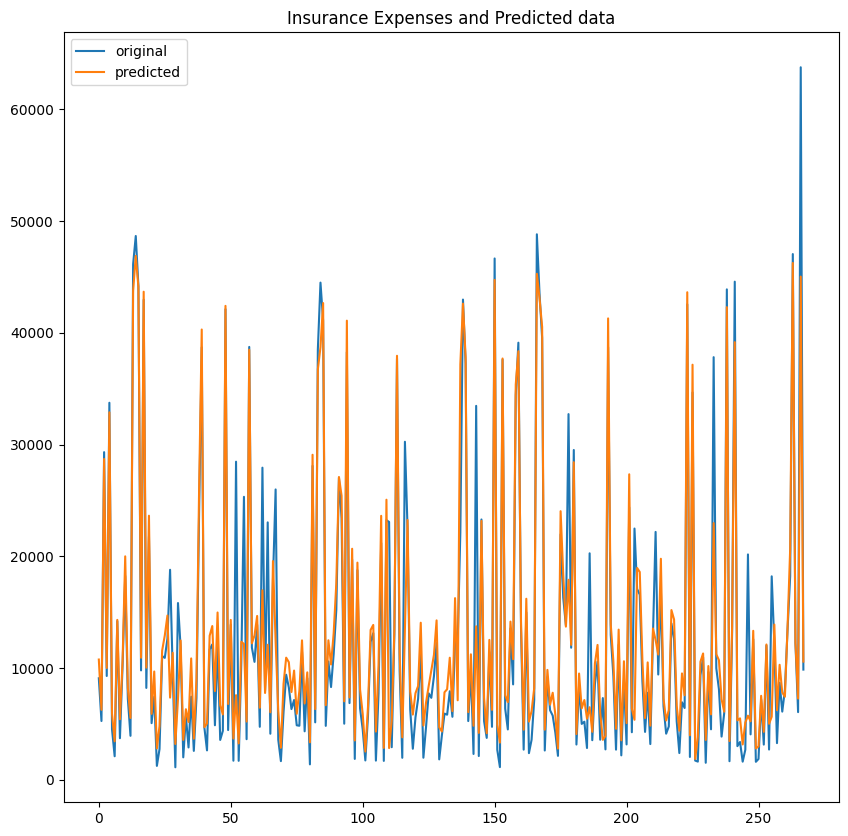

In [78]:
# model plotting accuracy

x_ax = range(len(y_test))
plt.figure(figsize=(10, 10))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Insurance Expenses and Predicted data")
plt.legend()